## Problem:  Classify the data into one of three flowers setosa, versicolor, virginica
### Input:  Rows having four features sepal length, sepal width, petal length, petal width
### Output: Setosa, Versicolor, Virginica

<tr>
    <td>
        <p style="text-align:center;"> Setosa</p>
        <img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Drawing" style="width: 200px; height: 200px;"/>
        </td>
    <td>
        <p style="text-align:center;"> Versicolor</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" alt="Drawing" style="width: 200px; height: 200px;"/>
        </td>
    <td>
        <p style="text-align:center;"> Virginica</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" alt="Drawing" style="width: 200px; height: 200px;"/>
        </td>
</tr>

### Key takeaway from session
* Classification problem structure
* How to visualize Data in 2D/3D if data is multidimensional
* Test and train data split
* Right metric to use for model Accuracy (i.e different for classification, regression and recommendation problems)
* Hyperparameter Tunning parameters for algorithms
* Making prediction for data
* Finally how to attack machine learning problem

### Importing dataset and visualizing data

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# import some data to play with
iris = datasets.load_iris()

In [3]:
# style setting for plots
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style("darkgrid")
sns.set_context("paper")

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data_x = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
data_y = pd.DataFrame(iris.target, columns=['Class'])
data_y.Class = data_y.Class.astype('category')

In [7]:
df_new = pd.concat([data_x, data_y], axis=1)

In [8]:
df_new.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
df_new.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df_new.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
Class                category
dtype: object

## Data Visualization

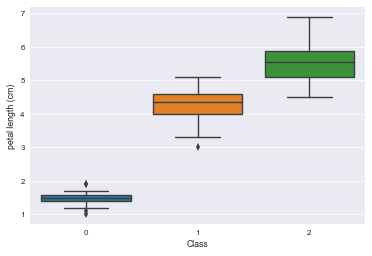

In [11]:
sns.boxplot(x='Class', y='petal length (cm)', data=df_new)

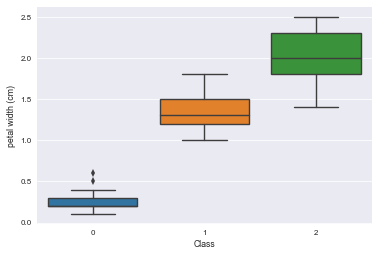

In [12]:
sns.boxplot(x='Class', y='petal width (cm)', data=df_new)

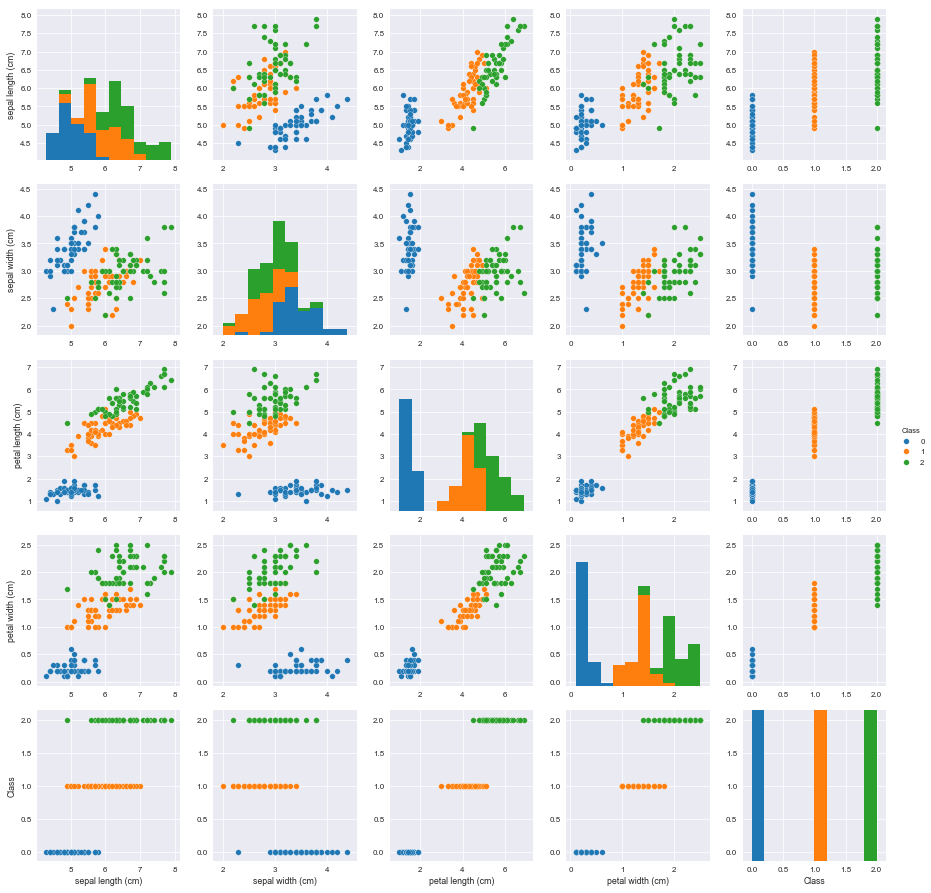

In [13]:
sns.pairplot(df_new, hue='Class')

## Visualization of data in 2D

([], <a list of 0 Text yticklabel objects>)

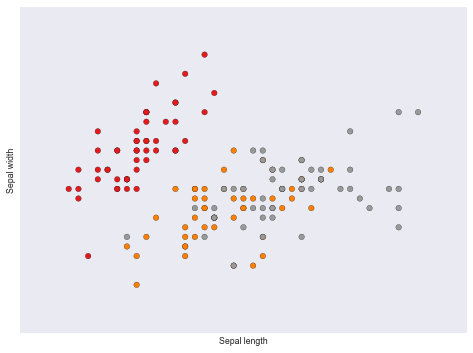

In [14]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



# plt.show()

 ## Visualization of all features using PCA dimentionality reduction

Text(0.5,0,'3rd eigenvector')

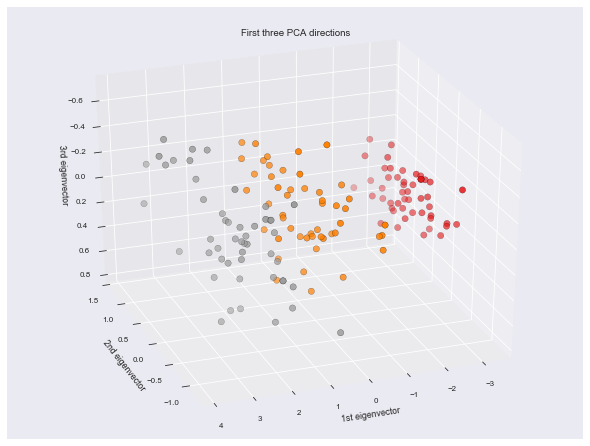

In [15]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

## Create training and testing data

In [16]:
from sklearn.model_selection import train_test_split
# using 20% data for testing
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)

In [17]:
print("Shape of train and test data",train_x.shape, test_x.shape, train_y.shape, test_y.shape)

Shape of train and test data (120, 4) (30, 4) (120, 1) (30, 1)


## KNN Model fitting

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(train_x, train_y)
knn.fit(train_x, np.ravel(train_y))
pred_values = knn.predict(test_x)

In [44]:
pred_values

array([2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 0, 1, 2, 2, 0])

## Accuracy of model

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
con_mat = confusion_matrix(test_y, pred_values)

In [46]:
con_mat

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  8]])

In [47]:
print("Accuracy is ", accuracy_score(test_y,pred_values)*100,"% for K-Value:",3)

Accuracy is  96.6666666667 % for K-Value: 3


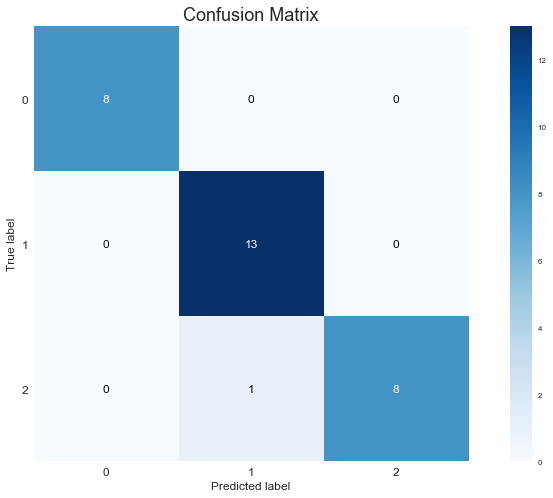

In [48]:
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(test_y, pred_values , normalize=False, title='Confusion Matrix', figsize=(15,8), title_fontsize=18, text_fontsize=12)

## Hyper-Parameter Tuning

## How to find optimum value of K

In [26]:
result = pd.DataFrame()
k_value=[]
accuracy=[]
for K in range(20):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(train_x, np.ravel(train_y))
    y_pred = knn.predict(test_x)
    accuracy.append(accuracy_score(test_y,y_pred)*100)
    k_value.append(K_value)
    print ("Accuracy is ", accuracy_score(test_y,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  96.6666666667 % for K-Value: 1
Accuracy is  93.3333333333 % for K-Value: 2
Accuracy is  96.6666666667 % for K-Value: 3
Accuracy is  96.6666666667 % for K-Value: 4
Accuracy is  96.6666666667 % for K-Value: 5
Accuracy is  96.6666666667 % for K-Value: 6
Accuracy is  100.0 % for K-Value: 7
Accuracy is  96.6666666667 % for K-Value: 8
Accuracy is  96.6666666667 % for K-Value: 9
Accuracy is  96.6666666667 % for K-Value: 10
Accuracy is  100.0 % for K-Value: 11
Accuracy is  96.6666666667 % for K-Value: 12
Accuracy is  100.0 % for K-Value: 13
Accuracy is  96.6666666667 % for K-Value: 14
Accuracy is  96.6666666667 % for K-Value: 15
Accuracy is  96.6666666667 % for K-Value: 16
Accuracy is  100.0 % for K-Value: 17
Accuracy is  96.6666666667 % for K-Value: 18
Accuracy is  96.6666666667 % for K-Value: 19
Accuracy is  96.6666666667 % for K-Value: 20


## K value Vs Accuracy Change Graph

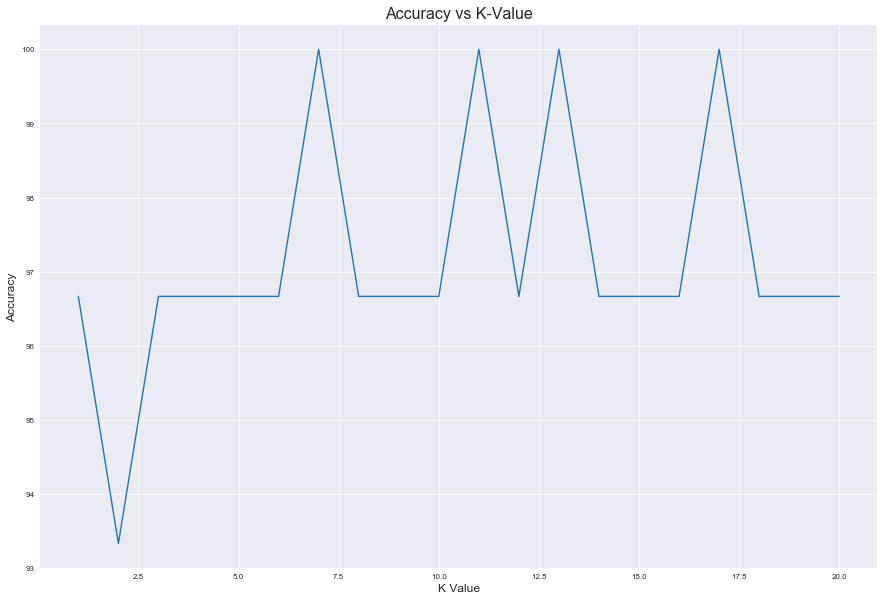

In [27]:
plt.figure(figsize=(15,10))
plt.title('Accuracy vs K-Value', fontsize=16)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.plot(k_value, accuracy)